In [1]:
from plugins.environments.awa_environment import AWAEnvironment
from plugins.interfaces.awa_interface import AWAInterface

# import data from csv file
import pandas as pd
variable_file = "plugins/environments/awa_variables.csv"
observable_file = "plugins/environments/awa_observables.csv"
variable_info = pd.read_csv(variable_file).set_index("NAME")
observable_info = pd.read_csv(observable_file).set_index("NAME").T

variables = variable_info[["MIN","MAX"]].T.to_dict()
observables = list(observable_info.keys())

for name in variables:
    variables[name] = [variables[name]["MIN"], variables[name]["MAX"]]
observables

env = AWAEnvironment(variable_file, observable_file, interface=AWAInterface(), target_charge=1.0)

In [2]:
meas = env.get_screen_measurement("13ARV1",["AWAVXI11ICT:Ch1"])

CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize1_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 15:49:40.699943216
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArrayData", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 15:49:40.700970870
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize0_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 15:49:40.701195567
................................................................

In [3]:
meas

{'13ARV1:image1:ArraySize1_RBV': 1200,
 '13ARV1:image1:ArraySize0_RBV': 1920,
 'AWAVXI11ICT:Ch1': 8.65081268995675e-10,
 '13ARV1:Cx': 315.75272345227734,
 '13ARV1:Cy': 237.84714469729496,
 '13ARV1:Sx': 51.385195519213916,
 '13ARV1:Sy': 47.834197099399844,
 '13ARV1:bb_penalty': -102.62909165028142,
 '13ARV1:total_intensity': 526354}

In [4]:
meas = env.get_observables(["13ARV1:Sx"])

In [5]:
meas

{'13ARV1:image1:ArraySize1_RBV': 1200.0,
 '13ARV1:image1:ArraySize0_RBV': 1920.0,
 'AWAVXI11ICT:Ch1': 9.516425308454794e-10,
 '13ARV1:Cx': 317.5512337815696,
 '13ARV1:Cy': 235.45302900494366,
 '13ARV1:Sx': 50.92430838518959,
 '13ARV1:Sy': 46.40291533389281,
 '13ARV1:bb_penalty': -102.45221438824233,
 '13ARV1:total_intensity': 506373.2,
 '13ARV1:image1:ArraySize1_RBV_std': 0.0,
 '13ARV1:image1:ArraySize0_RBV_std': 0.0,
 'AWAVXI11ICT:Ch1_std': 3.7920417519738573e-11,
 '13ARV1:Cx_std': 2.216659373780583,
 '13ARV1:Cy_std': 1.6947287892552902,
 '13ARV1:Sx_std': 2.519349762917003,
 '13ARV1:Sy_std': 1.9864092041622352,
 '13ARV1:bb_penalty_std': 6.694903328253004,
 '13ARV1:total_intensity_std': 50808.56243488887}

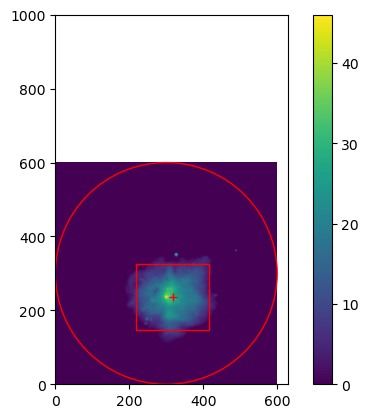

In [6]:
meas = env.get_screen_measurement("13ARV1",['13ARV1:Sx', 'AWAVXI11ICT:Ch1'], visualize=True)

In [7]:
meas

{'13ARV1:Sx': 49.280235303187,
 '13ARV1:image1:ArraySize1_RBV': 1200,
 '13ARV1:image1:ArraySize0_RBV': 1920,
 'AWAVXI11ICT:Ch1': 9.317257803313666e-10,
 '13ARV1:Cx': 317.64222458526496,
 '13ARV1:Cy': 236.4178978072738,
 '13ARV1:Sy': 45.138343887636665,
 '13ARV1:bb_penalty': -107.1902657534689,
 '13ARV1:total_intensity': 475846}